In [10]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/param_files/')
from model_files.nerm import model as model
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit
import seaborn as sns

In [2]:
mode1_100 = np.load('../../param_files/necro_pars10k_cluster1_5720_modwo5.npy')
tspan = np.linspace(0, 1800, 500)
m = model.components

In [ ]:
list(model.initial_conditions)

In [16]:
solverm12 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm12 = solverm12.run(param_values=mode1_100, num_processors = 20)
m1alldf100wt2 = wtm12.dataframe

2022-01-03 20:07:06.627 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-03 20:07:06.640 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-03 20:07:06.719 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-03 20:07:06.966 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-03 20:11:28.581 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-03 20:11:28.583 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-03 20:11:31.059 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [4]:
solverciapkdm1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
ciapkdm1 = solverciapkdm1.run(initials = {m.cIAP(btraf=None):2700}, param_values=mode1_100, num_processors = 20)
m1alldf100ciapkd = ciapkdm1.dataframe

2022-01-03 19:26:24.234 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-03 19:26:24.239 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-03 19:26:24.274 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-03 19:26:24.469 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-03 19:30:39.633 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-03 19:30:39.635 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-03 19:30:42.057 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(mode1_100)):
    plt.plot(tspan/60, m1alldf100ciapkd.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100ciapkd['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("cIAP KD [pMLKL] Normalized", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
plt.tight_layout()
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode1_pmlkl_allpars_redcolor_nogrid.pdf')
plt.show() 

In [5]:
solverciapoem1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
ciapoem1 = solverciapoem1.run(initials = {m.cIAP(btraf=None):90000}, param_values=mode1_100, num_processors = 20)
m1alldf100ciapoe = ciapoem1.dataframe

2022-01-03 19:30:45.265 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-03 19:30:45.270 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-03 19:30:45.304 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-03 19:30:45.497 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-03 19:34:55.548 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-03 19:34:55.551 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-03 19:34:58.175 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(mode1_100)):
    plt.plot(tspan/60, m1alldf100ciapoe.loc[n]['MLKLa_obs'].iloc[:]/m1alldf100ciapoe['MLKLa_obs'].iloc[:].max(),
             color = 'lightcoral', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("[pMLKL] Normalized", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
plt.tight_layout()
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode1_pmlkl_allpars_redcolor_nogrid.pdf')
plt.show() 

In [6]:
threshold = 2772

In [17]:
df_threshtimesc2100wt = m1alldf100wt2.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100ciapoe   = m1alldf100ciapoe.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100ciapkd = m1alldf100ciapkd.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [18]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': df_threshtimesc2100wt['MLKLa_obs'], 
                          'cIAP OE': df_threshtimesc2100ciapoe['MLKLa_obs'],
                          'cIAP KD': df_threshtimesc2100ciapkd['MLKLa_obs']})
dfclus0n = pd.DataFrame(data = mode1df, columns = ['WT', 'cIAP OE','cIAP KD'])
dfclus0n = pd.melt(dfclus0n)

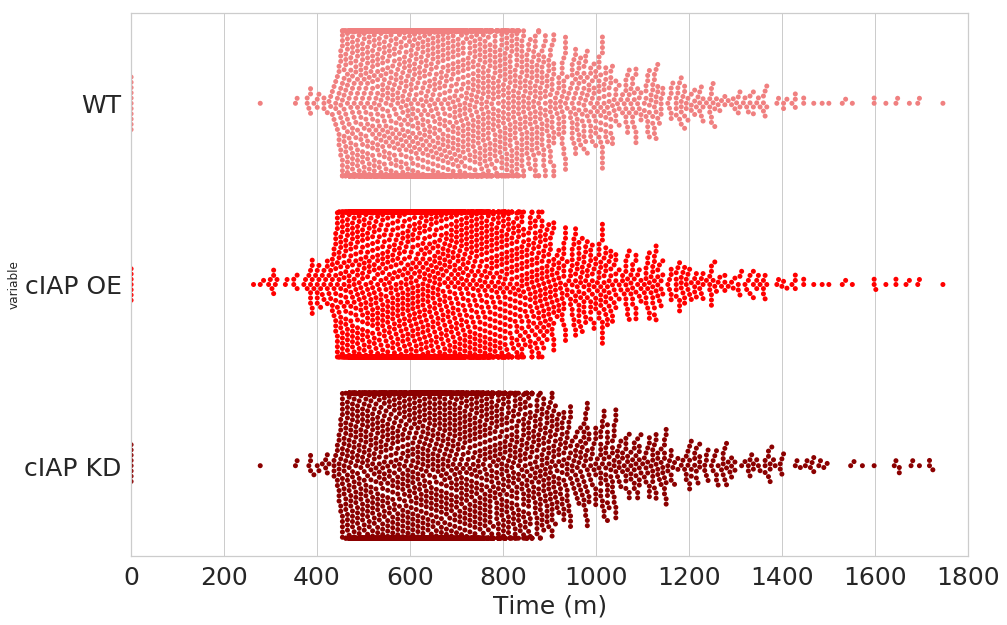

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"WT": "lightcoral", "cIAP OE": "red", "cIAP KD":"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('pmlkl_cyldkoa20ko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()

In [12]:
mode1 = []
clus_idxs = np.array(range(wtm1.nsims))
for idx in clus_idxs: 
    mlkl_traj = wtm1.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan/60, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    mode1.append(td)

In [13]:
mode1_ciapoe = []
clus_idxs = np.array(range(ciapkdm1.nsims))
for idx in clus_idxs: 
    mlkl_traj = ciapkdm1.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan/60, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    mode1_ciapoe.append(td)

In [14]:
mode1_ciapkd = []
clus_idxs = np.array(range(ciapoem1.nsims))
for idx in clus_idxs: 
    mlkl_traj = ciapoem1.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan/60, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    mode1_ciapkd.append(td)

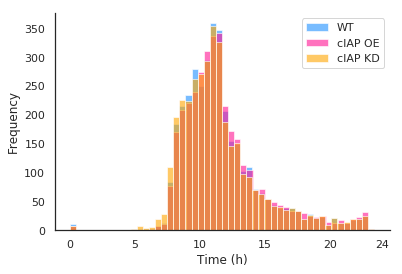

In [15]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
# print('clus', np.mean(CI_k63))
# print('clus', np.std(CI_k63))
fig, ax = plt.subplots()
sns.distplot(mode1, label ='WT',color="dodgerblue", bins=50, **kwargs, kde = False)
sns.distplot(mode1_ciapoe, label = 'cIAP OE',color="deeppink", bins=50, **kwargs, kde = False)
sns.distplot(mode1_ciapkd, label = 'cIAP KD',color="orange", bins=50, **kwargs, kde = False)
# sns.distplot(CI_a20, label='uncluster',color="orange", bins=25, **kwargs)
# sns.distplot(CI_cyld, label='uncluster',color="deeppink", bins=25, **kwargs)
plt.xlabel('Time (h)')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
# plt.xlim(xmax = 800)
# plt.ylim(ymax = 0.04)
plt.xticks([0, 5, 10, 15, 20, 24])
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# plt.savefig('k63_necrosome_pmlkl.pdf')
plt.show()